## Week 8: ggplot2 (Part I)

The <em>gg</em> in ggplot2 stands for "<strong>G</strong>rammar of <strong>G</strong>raphics", so you might guess that it is a package for data visualizations. ggplot2 does its best to take care of the tedious aspects of algorithmic visualization (like legends) and allows the programmer to focus on creating colorful, layered graphics.

<strong>ggplot2</strong> works by adding layers of visuals to an empty base layer. We add these layers by using the literal <code>+</code> operator. To see a list of every available layer in ggplot2, head to the <a href="http://docs.ggplot2.org/current/">documentation</a>. A lot of new programming concepts are best learned with a simple example, so let's make a quick scatterplot using iris and a time series plot of our NFL arrests data.

After we discuss the basics of ggplot2 and you guys make an example plot, we will work through the process of making a more complex plot, step by step. <u style=" text-decoration: underline;">Anything we don't finish in class will be your homework to finish before next week's lecture</u>. Next week we'll go further with ggplot2, so make sure you have the basics down.

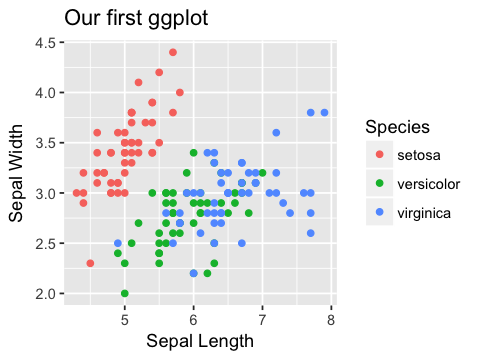

In [106]:
library(ggplot2)
library(plyr)
library(dplyr)

# This is to resize images for Jupyter, you wouldn't
# need this in RStudio. Feel free to play with the size
options(repr.plot.width=4, repr.plot.height=3)

# We can even assign ggplots to variables
p1 <- ggplot(iris) +                                               # base layer
        geom_point(aes(x=Sepal.Length, y=Sepal.Width, color=Species)) + # scatterplot layer
        ggtitle("Our first ggplot") +                              # title
        xlab("Sepal Length") +                                     # relabel the axes
        ylab("Sepal Width")                                        # relabel the axes

p1

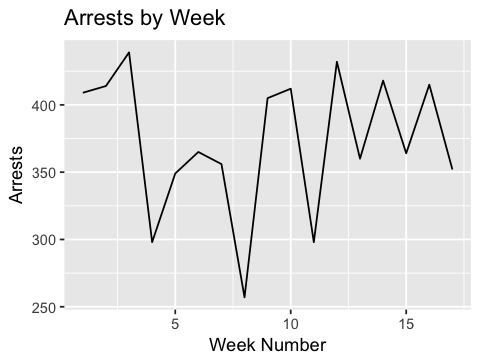

In [10]:
nfl <- read.table(file="nfl_arrests.csv", sep = ",", header=T)

# Let's fix those Detroit values again
nfl$arrests[is.na(nfl$arrests)] <- 0

byWeek <- nfl %>%
          group_by(week_num) %>%
          summarise(totArrests = sum(arrests))

p2 <- ggplot(byWeek) +
      geom_line(aes(x=week_num, y=totArrests)) +
      ggtitle("Arrests by Week") +
      xlab("Week Number") +
      ylab("Arrests")

p2

## Syntax

### Base Layer

All ggplots will begin with calling <code>ggplot(<em>aDataframe</em>)</code>. This creates the base layer of the graphic, which will be empty. This first layer allows all the following layers to <em>inherit</em> its attributes. In these basic ggplots, the dataframe is the only attribute being passed to the subsequent layers.

### Aesthetic Mapping

In the two example plots you may have noticed the <code>aes()</code> function... "aes" stands for <strong>aes</strong>thetic mapping. <code>aes()</code> takes arguments for the aesthetic attributes of the plot such as the axes, data to be used for coloring, the shape and size of points, or even the type of line to draw.

### Geometric Objects

In the example plots, we made class to <code>geom_point()</code> and <code>geom_line()</code>. The "geom" prefix stands for <strong>geom</strong>etric objects--every ggplot must have a call to at least one <code>geom_something()</code> function. There's no upper limit on the number of geometric layers.

In [19]:
# Make a base layer for the "women" dataset (a dataset built in with R)
baseLayer <- ggplot(<FILL IN>)

# Use aes() to map the women's weights to the X axis
# and the women's heights to the Y axis
plot <- baseLayer + geom_point(<FILL IN>)

# Add a title
plot <- plot + ggtitle("<FILL IN>")

# Display the plot
<FILL IN>

ERROR: Error in parse(text = x, srcfile = src): <text>:2:21: unexpected '<'
1: # Make a base layer for the women dataset (a dataset built in with R)
2: baseLayer <- ggplot(<
                       ^


It should resemble this image:

<img src="visAides/womenPlot.png" width="400px">

## More Aesthetic Mappings

Now let's sart using more of the aesthetic mappings available in <code>aes()</code>. For reference, the available aesthetics in <code>aes()</code> are below.

<ul>
    <li>
        <strong>Position</strong> can be chosen by <code>x=</code> and <code>y=</code>.
    </li>
    <li>
        <strong>Color</strong> changes the outside (border) color of the geometric object.
    </li>
    <li>
        <strong>Fill</strong> changes the inside color of the geometic object.
    </li>
    <li>
        <strong>Shape</strong> changes the shape of points in a scatterplot. (Usually by the levels of a factor variable.)
    </li>
    <li>
        <strong>Size</strong> changes the size of points in a scatterplot. (Usually by the levels of a factor variable.)
    </li>
    <li>
        <strong>Linetype</strong> changes the type of line used.
    </li>
    <li>
        <strong>Alpha</strong> changes the opacity of the lines or points in the plot.
    </li>
</ul>

To try out these new parameters, we will use the San Francisco crime classification dataset--one of Jason's personal favorites. The dataset in this repo is just a small sampling of the full file. If you would like to get the full dataset, [head over to Kaggle](https://www.kaggle.com/c/sf-crime). We'll do some basic cleaning, and then we will construct this heatmap of crimes:

<img src="visAides/crimePlot.png" width="500">

In [56]:
# Read data and drop first column, it's just an ID
crimes <- read.csv("crime.csv")
crimes <- crimes[, 2:ncol(crimes)]

head(crimes)

# What do you think the variables "X" and "Y" represent?

Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
2003-02-09 18:00:00,NON-CRIMINAL,LOST PROPERTY,Sunday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.4034,37.77542
2013-07-10 17:35:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,TARAVAL,NONE,300 Block of ASHTON AV,-122.4622,37.72395
2007-05-01 15:00:00,NON-CRIMINAL,"AIDED CASE, DOG BITE",Tuesday,BAYVIEW,NONE,BAY SHORE BL / SILVER AV,-122.4047,37.73295
2006-12-28 19:42:00,DRUG/NARCOTIC,"CONTROLLED SUBSTANCE VIOLATION, LOITERING FOR",Thursday,TENDERLOIN,"ARREST, BOOKED",0 Block of TAYLOR ST,-122.4107,37.78249
2009-11-24 11:15:00,ASSAULT,THREATS AGAINST LIFE,Tuesday,BAYVIEW,NONE,3800 Block of 3RD ST,-122.3879,37.74226
2008-03-09 07:46:00,OTHER OFFENSES,TRAFFIC VIOLATION,Sunday,MISSION,"ARREST, CITED",3000 Block of MISSION ST,-122.4180,37.74859


In [39]:
# Finish this exploratory analysis

numberOfRows <- <FILL IN>
numberOfCols <- <FILL IN>

# Get the distinct types of crimes
crimeCategories <- <FILL IN>

# Don't touch this
print(paste("There are", numberOfRows, "observations."))
print(paste("There are", numberOfRows, "variables."))
print(paste("List of all types of crimes:", paste(crimeCategories, collapse = ", ")))

ERROR: Error in parse(text = x, srcfile = src): <text>:3:17: unexpected '<'
2: 
3: numberOfRows <- <
                   ^


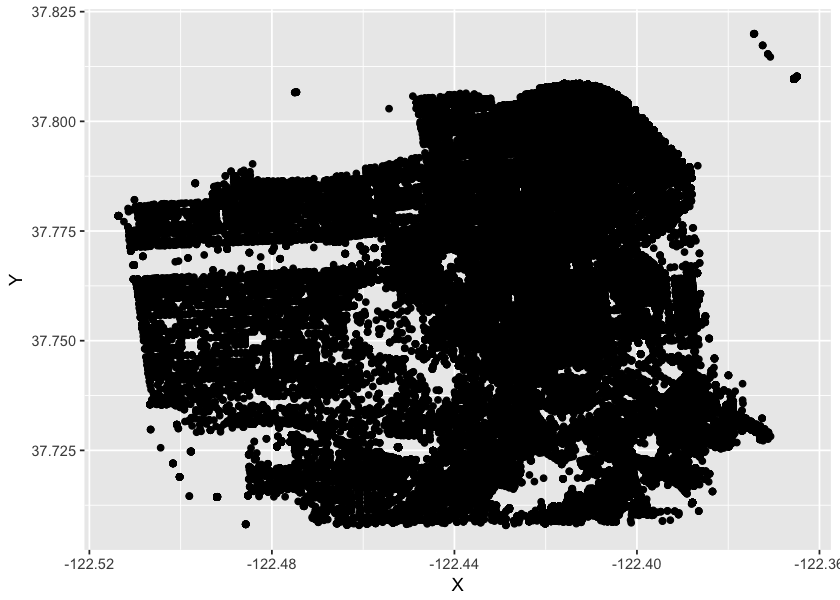

In [138]:
# Make a scatterplot with latitude on the X axis
# and longitude on the Y axis

#ggplot(crimes) +
#geom_point(aes(x=<FILLIN>, y=<FILLIN>))

ggplot(crimes) +
geom_point(aes(x=X, y=Y))

In [58]:
# All those points in the top right are incorrect.
# Find out how many there are and remove them.

# Use conditional selection to grab the observations in the top right
#badValues <- crime[ (crime$<FILLIN> > <FILLIN>) & (crime$<FILLIN> > <FILLIN>), ]
#numberOfBadValues <- nrow(badValues)

badValues <- crimes[ (crimes$X > -121.5) & (crimes$Y > 60), ]
numberOfBadValues <- nrow(badValues)

# Reverse the conditional selection to remove them from the crimes dataframe
crimes <- crimes[(crimes$X < -121.5) & (crimes$Y < 60), ]
newNrow <- nrow(crimes)

print(paste("Number of wrong observations:", numberOfBadValues))
print(paste("Number of observations after removal:", newNrow))
stopifnot(numberOfBadValues + newNrow == 100000)

[1] "Number of wrong observations: 0"
[1] "Number of observations after removal: 99991"


ERROR: Error: numberOfBadValues + newNrow == 1e+05 is not TRUE


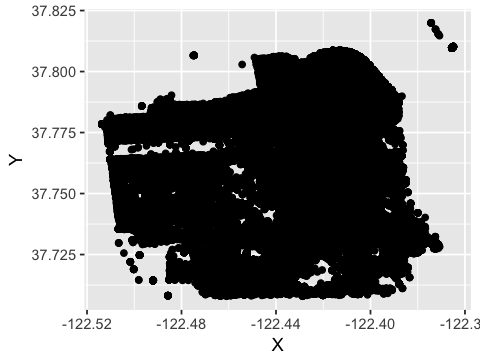

In [61]:
# Retry the scatterplot

#betterPlot <- ggplot(crimes) +
#geom_point(<FILLIN>)

betterPlot <- ggplot(crimes) +
geom_point(aes(x=X, y=Y))

betterPlot

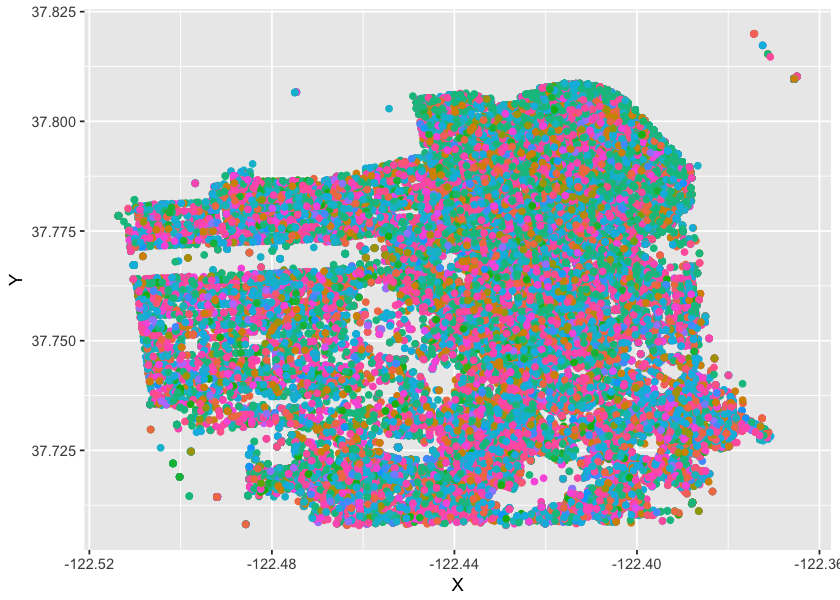

In [140]:
# Color the points by the type of crime

#coloredPlot <- ggplot(crimes) +
#geom_point(aes(x=X, y=Y, fill=<FILLIN>)) +
#theme(legend.position="none")

overColoredPlot <- ggplot(crimes) +
geom_point(aes(x=X, y=Y, color=Category)) +
theme(legend.position="none")

overColoredPlot

We're getting close, but there's just far too much going on here for the plot to <strong><em>say</em></strong> anything. Too much color, too little information. Let's only plot the top 10 most common crimes. This means we need to...

<ol>
<li>
    Get a frequency table of the crime categories.
</li>
<li>
    Sort the dataframe so the most frequent crimes are at the top.
</li>
<li>
    Get the names of the top 10 crimes as a vector.
</li>
<li>
    Use that vector to subset the original <code>crimes</code> dataframe.
</li>
</ol>

In [96]:
# Use table to get a frequency count of the crimes

# crimeTable <- table(<FILLIN>)
crimeTable <- table(crimes$Category)

# Here I am transforming the table object into a dataframe for you.
crimeFreq <- as.data.frame(crimeTable)
names(crimeFreq) <- c("Category", "Frequency")

# Sort the dataframe by "Frequency"
# Put most frequent at top
# HINT: arrange is from the dplyr library. (Week 5)

# crimeFreq <- arrange(<FILLIN>)
crimeFreq <- arrange(crimeFreq, desc(Frequency))

# Grab the top ten crime names

#topTen <- crimeFreq[ <FILLIN> , <FILLIN> ]
topTen <- crimeFreq[1:10, "Category"]

# Now subset the original dataframe to
# only those top ten crimes

#lessCrimes <- crimes[<FILLIN>, ]
lessCrimes <- crimes[crimes$Category %in% topTen, ]

# If these functions throw an error then you made a mistake.
stopifnot(crimeFreq$Frequency[1] == 19935)
stopifnot(topTen[4] == "ASSAULT")
stopifnot(nrow(lessCrimes) == 83538)

print(paste("Top ten crimes:", paste(topTen, collapse=", ")))

[1] "Top ten crimes: LARCENY/THEFT, OTHER OFFENSES, NON-CRIMINAL, ASSAULT, VEHICLE THEFT, DRUG/NARCOTIC, VANDALISM, WARRANTS, BURGLARY, SUSPICIOUS OCC"


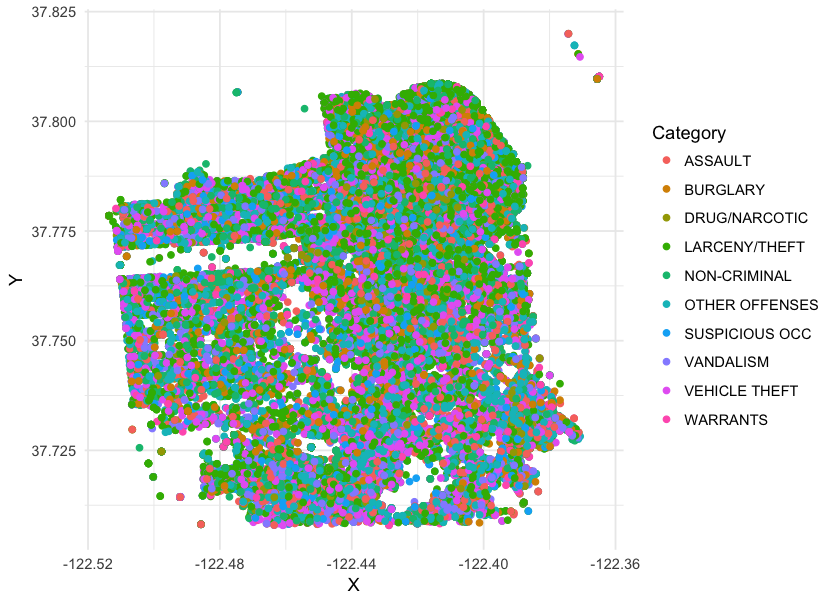

In [102]:
options(repr.plot.width=7, repr.plot.height=5)

# Remake the ggplot scatterplot with the subsetted data

#lessColoredPlot <- ggplot(<FILLIN>) +
#geom_point(aes(x=X, y=Y, color=Category)) +
#theme_minimal()

lessColoredPlot <- ggplot(lessCrimes) +
geom_point(aes(x=X, y=Y, color=Category)) +
theme_minimal()

lessColoredPlot

That's better... and bigger! Now let's add a layer <strong>under</strong> the scatterplot. This layer will be a map of the San Francisco peninsula. The code chunk below downloads the development version of the <code>ggmap</code> package, gets a streetmap of San Francisco, and prints a preview.

from URL https://api.github.com/repos/dkahle/ggmap/zipball/master
Installing ggmap
'/Library/Frameworks/R.framework/Resources/bin/R' --no-site-file --no-environ  \
  --no-save --no-restore --quiet CMD INSTALL  \
  '/private/var/folders/qq/mnl0_gd53sz_chfmjlk_s02w0000gn/T/Rtmp4IoOde/devtools12eed38f005/dkahle-ggmap-c6b7579'  \
  --library='/Library/Frameworks/R.framework/Versions/3.3/Resources/library'  \
  --install-tests 

Reloading installed ggmap
Google Maps API Terms of Service: http://developers.google.com/maps/terms.
Please cite ggmap if you use it: see citation("ggmap") for details.

Attaching package: ‘ggmap’

The following object is masked _by_ ‘.GlobalEnv’:

    crime

Source : https://maps.googleapis.com/maps/api/staticmap?center=37.767719,-122.422772&zoom=12&size=640x640&scale=2&maptype=roadmap&language=en-EN


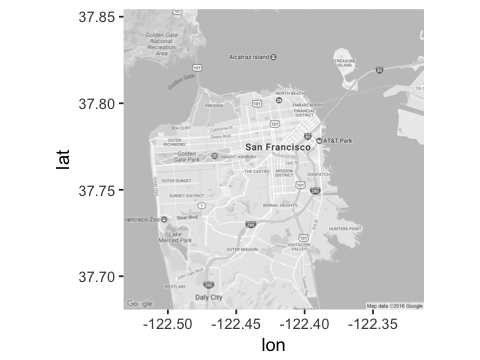

In [115]:
devtools::install_github("dkahle/ggmap")
SFmap <- get_map(location = c(lon = mean(lessCrimes$X), lat = mean(lessCrimes$Y)), 
                zoom = 12, maptype = "roadmap", color = "bw")
ggmap(SFmap)

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Warning message:
“Removed 1 rows containing missing values (geom_rect).”

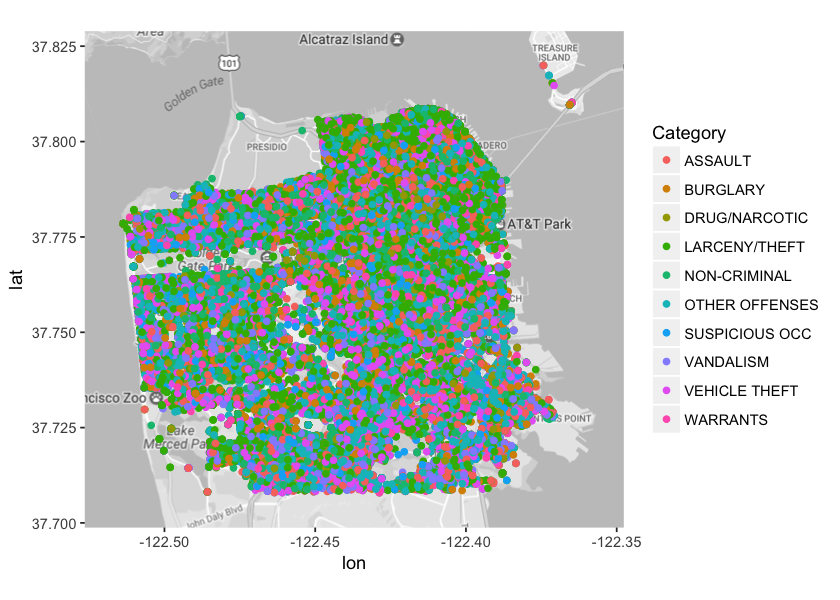

In [126]:
options(repr.plot.width=7, repr.plot.height=5)

# We need to make the streetmap the base layer, 
# so we change the order of the layers.

# HINT: Where are the columns X, Y, and Category coming from?
#almostDone <- ggmap(SFmap) +
#geom_point(aes(x=X, y=Y, color=Category), data=<FILLIN>) +
#scale_x_continuous(limits=c(-122.518307, -122.355789)) +
#scale_y_continuous(limits=c(37.7047, 37.823))

almostDone <- ggmap(SFmap) +
geom_point(aes(x=X, y=Y, color=Category), data=lessCrimes) +
scale_x_continuous(limits=c(-122.518307, -122.355789)) +
scale_y_continuous(limits=c(37.7047, 37.823))

almostDone

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Warning message:
“Removed 1 rows containing missing values (geom_rect).”

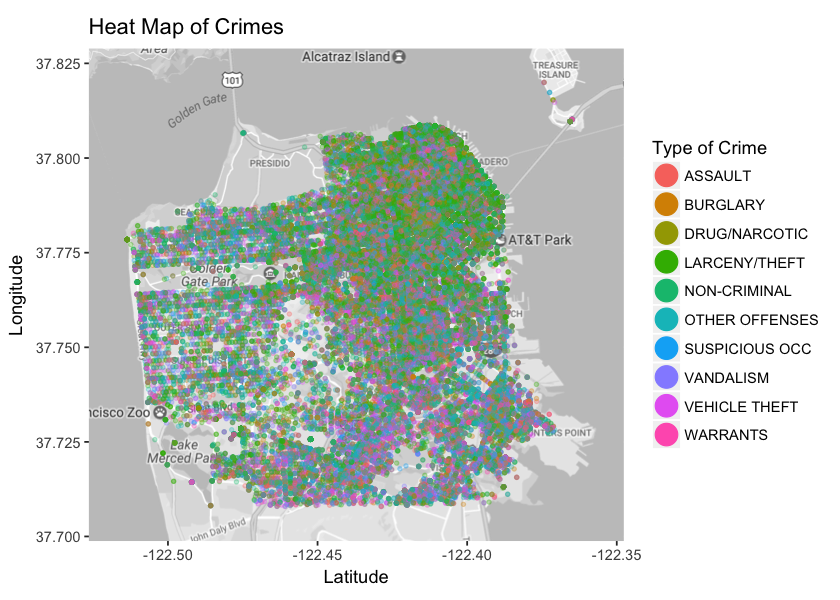

In [137]:
# Add a title, change the axes labels, change size to 0.9, and change alpha (the opacity) to 0.3

#done <- ggmap(SFmap) +
#geom_point(aes(x=X, y=Y, color=Category), data=lessCrimes, size=<FILLIN>, alpha=<FILLIN>) +
#scale_x_continuous(limits=c(-122.518307, -122.355789)) +
#scale_y_continuous(limits=c(37.7047, 37.823)) +
#guides(colour = guide_legend(override.aes = list(alpha=1.0, size=6.0), title="Type of Crime")) +
#ggtitle(<FILLIN>)  +
#xlab(<FILLIN>) +
#ylab(<FILLIN>)

done <- ggmap(SFmap) +
geom_point(aes(x=X, y=Y, color=Category), data=lessCrimes, size=0.9, alpha=0.3) +
scale_x_continuous(limits=c(-122.518307, -122.355789)) +
scale_y_continuous(limits=c(37.7047, 37.823)) +
guides(colour = guide_legend(override.aes = list(alpha=1.0, size=6.0), title="Type of Crime")) +
ggtitle("Heat Map of Crimes")  +
xlab("Latitude") +
ylab("Longitude")

done

## Congrats!

That is this week's introduction to using ggplot2. Make sure you understand these basics, because next week will pick up from right here... <strong>literally</strong>.